In [49]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [50]:
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [51]:
stock_list=[]

for stock in ['ADPL_2019.csv','ADRS_2019.csv','ARNT_2019.csv','ATGR_2019.csv','ATPL_2019.csv','ERNT_2019.csv','HT-2019.csv','KOEI_2019.csv','PODR_2019.csv','RIVP_2019.csv']:
    df_tmp = pd.read_csv(stock, delimiter=';', decimal=',')
    df_tmp['date'] = pd.to_datetime(df_tmp['date'])
    df_tmp = df_tmp.set_index('date')
    df_tmp = df_tmp.sort_index()
    df_tmp = df_tmp['last_price'].to_frame().rename(columns={'last_price':stock[:-4]})
    
    print(len(df_tmp))
    
    stock_list.append(df_tmp)
    

244
243
206
231
239
238
247
194
243
247


In [52]:
df = pd.concat(stock_list, axis=1)

<AxesSubplot:xlabel='date'>

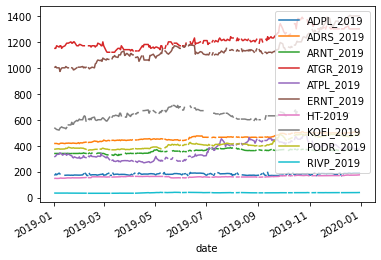

In [53]:
df.plot() #wo filled data

<AxesSubplot:xlabel='date'>

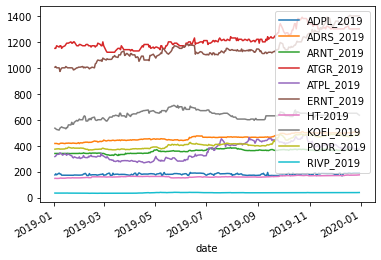

In [54]:
df.fillna(method='ffill').plot()#with filled data

<AxesSubplot:xlabel='date'>

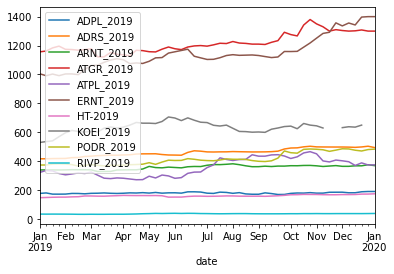

In [32]:
df.resample('W').mean().plot()#what happened to the original plot of the movie

<AxesSubplot:xlabel='date'>

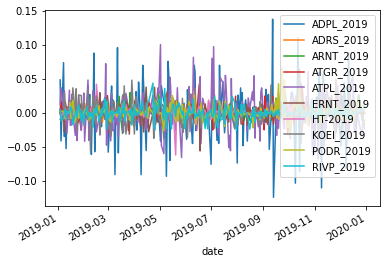

In [55]:
df.pct_change().plot()

<AxesSubplot:>

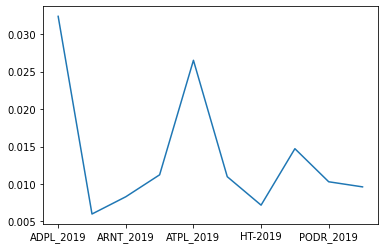

In [56]:
df.pct_change().std().plot()

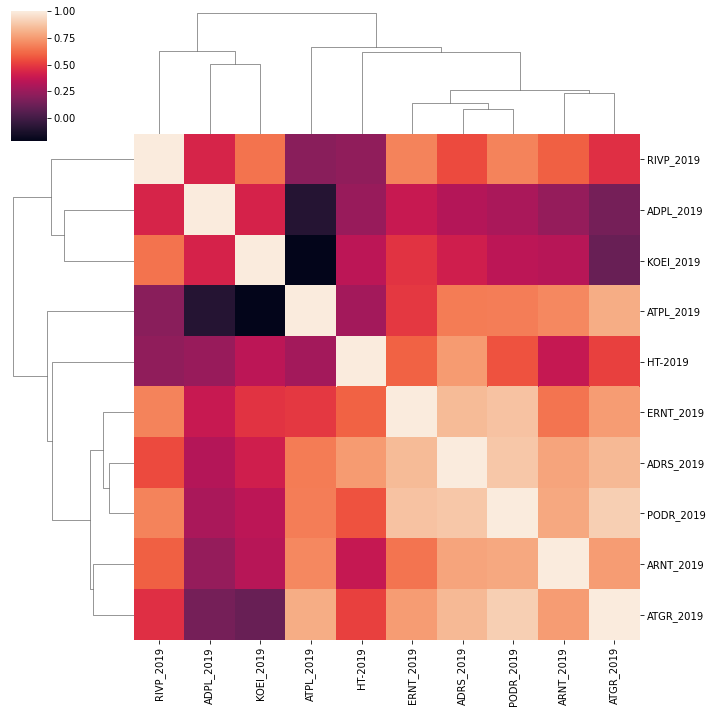

In [15]:
sns.clustermap(df.corr(method='spearman'))#dodaj jos brojevnu kalkulaciju korelacije radi bete

In [58]:
stock_list=[]

for stock in ['ADPL_2021.csv','ADRS_2021.csv','ARNT_2021.csv','ATGR_2021.csv','ATPL_2021.csv','ERNT_2021.csv','HT-2021.csv','KOEI_2021.csv','PODR_2021.csv','RIVP_2021.csv']:
    df_tmp = pd.read_csv(stock, delimiter=';', decimal=',')
    df_tmp['date'] = pd.to_datetime(df_tmp['date'])
    df_tmp = df_tmp.set_index('date')
    df_tmp = df_tmp.sort_index()
    df_tmp = df_tmp['last_price'].to_frame().rename(columns={'last_price':stock[:-4]})
    
    print(len(df_tmp))
    
    stock_list.append(df_tmp)
    

244
246
202
232
249
247
250
198
246
250


In [59]:
df = pd.concat(stock_list, axis=1)

<AxesSubplot:xlabel='date'>

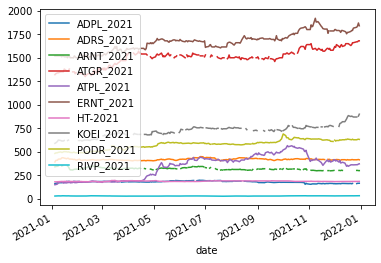

In [60]:
df.plot()#wo filled data

<AxesSubplot:xlabel='date'>

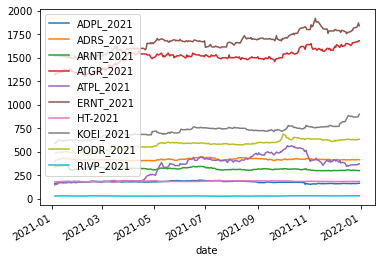

In [61]:
df.fillna(method='ffill').plot()

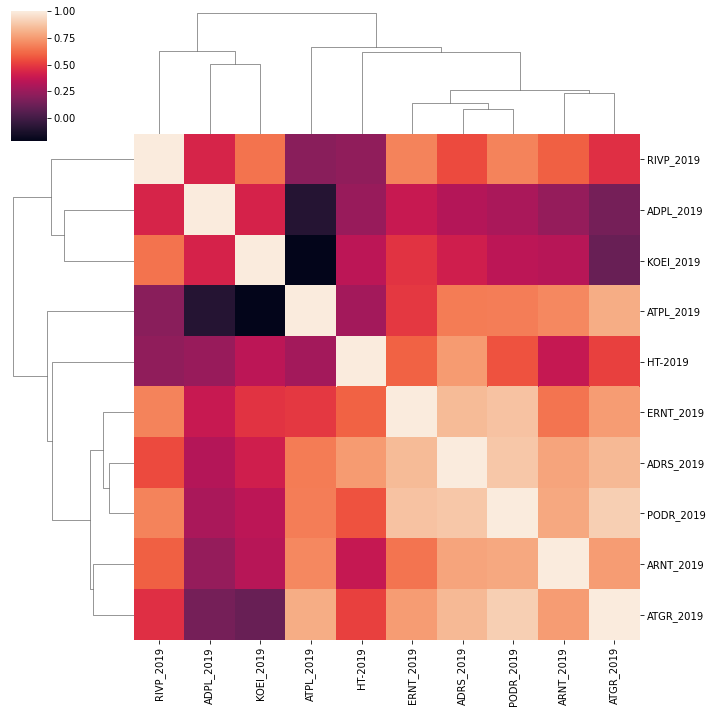

In [28]:
sns.clustermap(df.corr(method='spearman'))

In [71]:
returns=df.pct_change()
returns

,ADPL_2021,ADRS_2021,ARNT_2021,ATGR_2021,ATPL_2021,ERNT_2021,HT-2021,KOEI_2021,PODR_2021,RIVP_2021
date,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.021672,0.040816,0.011765,0.007576,0.010000,0.000000,-0.002770,0.008475,0.010352,0.020270
2021-01-07,0.030303,0.004902,0.005814,0.007519,0.039604,0.000000,0.011111,0.025210,0.004098,0.026490
2021-01-08,0.011765,0.029268,0.011561,0.000000,0.082540,0.000000,0.000000,0.024590,0.008163,0.012903
2021-01-11,-0.005814,0.004739,0.000000,0.007463,0.052786,0.000000,0.010989,-0.008000,0.010121,-0.015924
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.000000,-0.004796,0.000000,0.000000,0.000000,0.013966,-0.002717,-0.005714,-0.009464,-0.009317
2021-12-27,-0.009174,0.000000,-0.006579,0.006024,0.005540,0.005510,0.002725,0.000000,0.000000,0.018809
2021-12-28,0.018519,0.004819,0.000000,0.000000,0.000000,0.008219,0.002717,0.000000,0.006369,-0.006154


In [65]:
CROBEX_2021=pd.read_csv('CROBEX-2021.csv',delimiter=';', decimal=',')
CROBEX10_2021=pd.read_csv('CROBEX10-2021.csv',delimiter=';', decimal=',')#još dodaj german bonds

In [72]:
X = [['returns']]
y = [['CROBEX_2021']]
model = LinearRegression()
model.fit(X,y)
model.coef_

C:\Users\Marija\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


ValueError: could not convert string to float: 'returns'